    Ben Christensen
    October 17, 2018
    Wasserman Chapter 8

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

## Problem 1

In [2]:
#Initialize observations of LSAT scores and GPA
LSAT = np.array([576, 635, 558, 578, 666, 580, 555, 661, 
                 651, 605, 653, 575, 545, 572, 594])
GPA =  np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43,
                 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96])

X = zip(LSAT, GPA)
#Calculate the plug-in estimate for the correlation coefficient
def T(y,z):
    y_bar, z_bar = np.mean(y), np.mean(z)
    return np.sum((y-y_bar)*(z-z_bar)) / np.sqrt(np.sum((y-y_bar)**2)*np.sum((z-z_bar)**2))

theta_hat = T(LSAT, GPA)
print("Correlation coefficient:", theta_hat)

Correlation coefficient: 0.776374491289


In [3]:
#Calculate the approximate standard error using bootstrap with 
#    B = 1000
B = 1000
#Draw a Bootstrap sample
def Bootstrap(x,y,B=1000):
    T_n = []
    B_y = []
    B_z = []
    for i in range(B):
        mask = np.random.randint(0, len(x), len(x))
        B_y = x[mask]
        B_z = y[mask]
        T_n.append(T(B_y, B_z))
    return np.array(T_n)

T_n = Bootstrap(LSAT,GPA,B)
def std_err(x,y,B=1000):
    T_n = Bootstrap(x,y,B)
    v_B = (1/B)*np.sum((T_n - (1/B)*np.sum(T_n))**2)
    return np.sqrt(v_B)
    
se_B = std_err(LSAT, GPA)
print("Approximate standard error:", se_B)
    


Approximate standard error: 0.130955735353


In [4]:
#Calculate the normal-based 95 percent confidence interval
def norm_itvl(alpha):
    L = theta_hat - norm.ppf(1-alpha/2)*se_B
    U = theta_hat + norm.ppf(1-alpha/2)*se_B
    return L, U

L, U = norm_itvl(.05)
print("95% Normal-Based confidence interval:")
print("(", L, ", ", U, ")", sep='')

95% Normal-Based confidence interval:
(0.519705966428, 1.03304301615)


In [5]:
#Calculate the pivotal 95 percent confidence interval
alpha = .05
#Find the 1-alpha/2 sample quantile and alpha/2 sample quantile
#    of the Bootstrap versions of the plug-inestimates.
def Pivot(alpha, T_n):
    Theta_stars = np.sort(T_n)
    L_index = len(T_n)*(1-alpha/2)
    theta_L = Theta_stars[int(L_index)]
    R_index = len(T_n)*alpha/2
    theta_R = Theta_stars[int(R_index)]
    L = 2*theta_hat - theta_L
    U = 2*theta_hat - theta_R
    return L, U, theta_L, theta_R

L, U = Pivot(alpha, T_n)[:2]
print("95% Pivotal Confidence Interval:")
print("(", L, ", ", U, ")", sep='')

95% Pivotal Confidence Interval:
(0.589239397098, 1.06935491734)


In [6]:
#Calculate the Percentile 95 percent confidence interval
alpha = .05
U,L = Pivot(alpha, T_n)[2:]
print("95% Percentile Confidence Interval:")
print("(", L, ", ", U, ")", sep='')

95% Percentile Confidence Interval:
(0.483394065236, 0.963509585481)


## Problem 2

In [7]:
B, n, alpha = 1000, 50, .05
#Define the skew linear functional
def T(x):
    sigma = np.sqrt(np.mean((x - np.mean(x))**2))
    return np.mean((x - np.mean(x))**3) / sigma**3
#This T(x) is getting blowup for the sample....
nL, nU, vL, vU, pL, pU = [], [], [], [], [], []
for i in range(1000):
    Y = np.random.randn(n)
    X = np.exp(Y)
    theta_hat = T(X)
    T_n = []
    B_x = []
    #Find 1000 theta* values through Bootstrap samples
    for i in range(B):
        mask = np.random.randint(0, len(X), len(X))
        B_x = X[mask]
        T_n.append(T(B_x))
    T_n = np.array(T_n)
    #Calculate the standard error implicitly used by 
    #    the interval funcitons called below
    s_B = np.sqrt((1/B)*np.sum((T_n - (1/B)*np.sum(T_n))**2))
    #Calculate the normal 95% confidence interval
    norm_interval = norm_itvl(.05)
    nL.append(norm_interval[0])
    nU.append(norm_interval[1])
    #Calculate the Pivot 95% confidence interval
    pvt_interval = Pivot(.05, T_n)[:2]
    vL.append(pvt_interval[0])
    vU.append(pvt_interval[1])
    #Calculate the Percentile 95% confidence interval
    pct_interval = Pivot(.05, T_n)[2:][::-1]
    pL.append(pct_interval[0])
    pU.append(pct_interval[1])
    
normal = np.mean(nL), np.mean(nU)
pivot = np.mean(vL), np.mean(vU)
percentile = np.mean(pL), np.mean(pU)

print("95% Normal confidence interval:")
print(normal)
print("95% Pivot confidence interval:")
print(pivot)
print("95% Percentile confidence interval:")
print(percentile)

95% Normal confidence interval:
(2.3696450461908127, 2.8829820959132002)
95% Pivot confidence interval:
(1.717460923160359, 4.2398220435189691)
95% Percentile confidence interval:
(1.012805098585045, 3.5351662189436537)


Above, I calculate the 3 types of boot-strap confidence intervals 1000 times and take the average lower and upper bounds for the estimated true coverage of the 3 intervals.

## Problem 6

## a)

In [8]:
mu, n = 5, 100
X = np.random.normal(mu, 1, n)
theta = np.exp(mu)
def T(x):
    return np.exp(np.mean(x))
theta_hat = T(X)
#Find 1000 theta* values using 1000 bootstrap samples size n==100
T_n = []
B_y = []
B_z = []
for i in range(B):
    mask = np.random.randint(0, len(X), len(X))
    B_x = X[mask]
    T_n.append(T(B_x))

T_n = np.array(T_n)
se_B = np.sqrt((1/B)*np.sum((T_n - (1/B)*np.sum(T_n))**2))
norm_interval = norm_itvl(.05)
print("Approximation for standard error:")
print(se_B)
print("95% Normal confidence interval:")
print(norm_interval)
print("Theta hat:", theta_hat)
print("Theta:", theta)

Approximation for standard error:
13.4828053644
95% Normal confidence interval:
(119.12461064534902, 171.97623649506298)
Theta hat: 145.55042357
Theta: 148.413159103


## b)

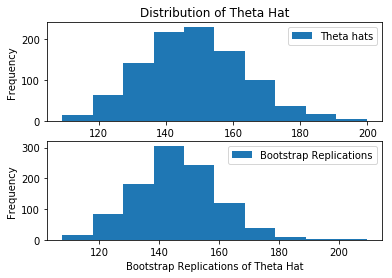

In [9]:
#Histogram of the true distribution of theta hat
theta_hats = []
for i in range(1000):
    X = np.random.normal(mu, 1, n)
    theta_hats.append(T(X))
plt.subplot(211)
plt.hist(theta_hats, label="Theta hats")
plt.title("Distribution of Theta Hat")
plt.ylabel("Frequency")
plt.legend()
#Histogram of the bootstrap replications
plt.subplot(212)
plt.hist(T_n, label="Bootstrap Replications")
#plt.vlines(theta_hat, 0, 350, label="Theta hat")
#plt.title("Histogram of the Bootstrap Replications of Theta Hat")
plt.xlabel("Bootstrap Replications of Theta Hat")
plt.ylabel("Frequency")
#plt.ylim(0,300)
plt.legend()
plt.show()

## Problem 7

## a)

In [10]:
theta, n = 1, 50
X = np.random.uniform(0, theta, n)
T = lambda x: np.max(x)
theta_hat = T(X)
#Find 1000 theta* values using 1000 bootstrap samples size n==100
T_n = []
B_y = []
B_z = []
for i in range(B):
    mask = np.random.randint(0, len(X), len(X))
    B_x = X[mask]
    T_n.append(T(B_x))
    
T_n = np.array(T_n)
se_B = np.sqrt((1/B)*np.sum((T_n - (1/B)*np.sum(T_n))**2))
norm_interval = norm_itvl(.05)
print("Approximation for standard error:")
print(se_B)
print("95% Normal confidence interval:")
print(norm_interval)
print("Theta hat:", theta_hat)
print("Theta:", theta)

Approximation for standard error:
0.0209453400767
95% Normal confidence interval:
(0.95875893460107531, 1.0408631589897757)
Theta hat: 0.999811046795
Theta: 1


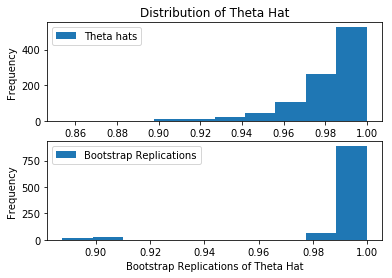

In [11]:
#Histogram of the true distribution of theta hat
theta_hats = []
for i in range(1000):
    X = np.random.uniform(0, theta, n)
    theta_hats.append(T(X))
plt.subplot(211)
plt.hist(theta_hats, label="Theta hats")
plt.title("Distribution of Theta Hat")
plt.ylabel("Frequency")
plt.legend()
#Histogram of the bootstrap replications
plt.subplot(212)
plt.hist(T_n, label="Bootstrap Replications")
#plt.vlines(theta_hat, 0, 350, label="Theta hat")
#plt.title("Histogram of the Bootstrap Replications of Theta Hat")
plt.xlabel("Bootstrap Replications of Theta Hat")
plt.ylabel("Frequency")
#plt.ylim(0,300)
plt.legend()
plt.show()